In [7]:
#step 1) import all libraries you need 
import pandas as pd
import numpy as np 
import scipy.stats as st 
import math 

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
sns.set_style('whitegrid')

import missingno as msno 

from sklearn.preprocessing import StandardScaler 
from scipy import stats 

#step 2) import dataset 
pd.set_option('display.max_columns', None)
df = pd.read_csv('vgsales.csv')
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
#analyze the data 
df.describe()

#total of 16598 rows, 11 columns 
#missing data in Year 


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
#drop all 2016 data 

drop_row_index = df[df['Year'] > 2015].index 
df = df.drop(drop_row_index)
df.shape

(16250, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [4]:
df.values

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

In [19]:
df.isnull().sum()
#not much missing datasets 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [20]:
#Q1) what genre games have been made the most?
df['Genre'].value_counts()
#looks like it is 'Action'

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

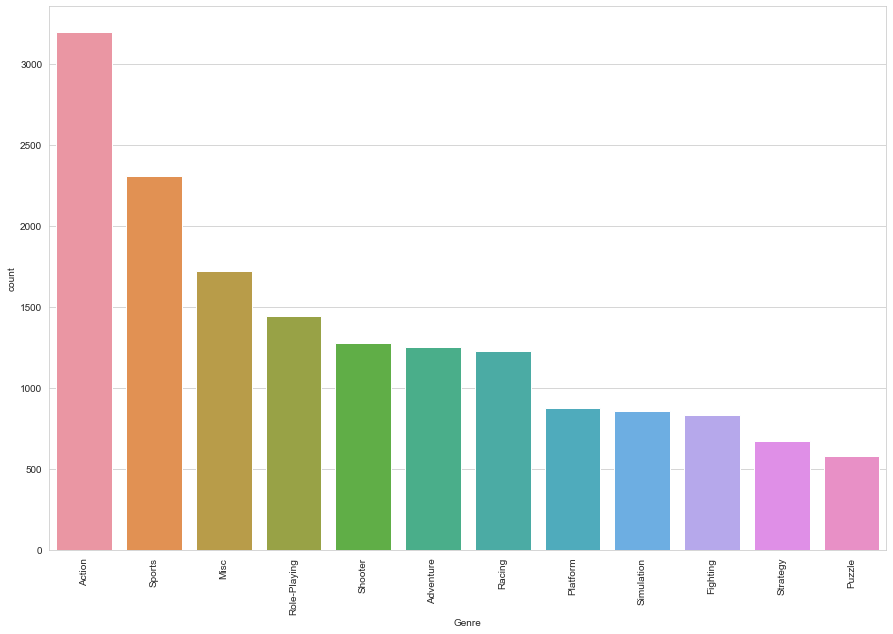

In [21]:
#making graph for Q1 
plt.figure(figsize = (15,10))
sns.countplot(x='Genre', data = df, order = df['Genre'].value_counts().index)
plt.xticks(rotation = 90)

In [22]:
#Q2) which year had the most game release?
df['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

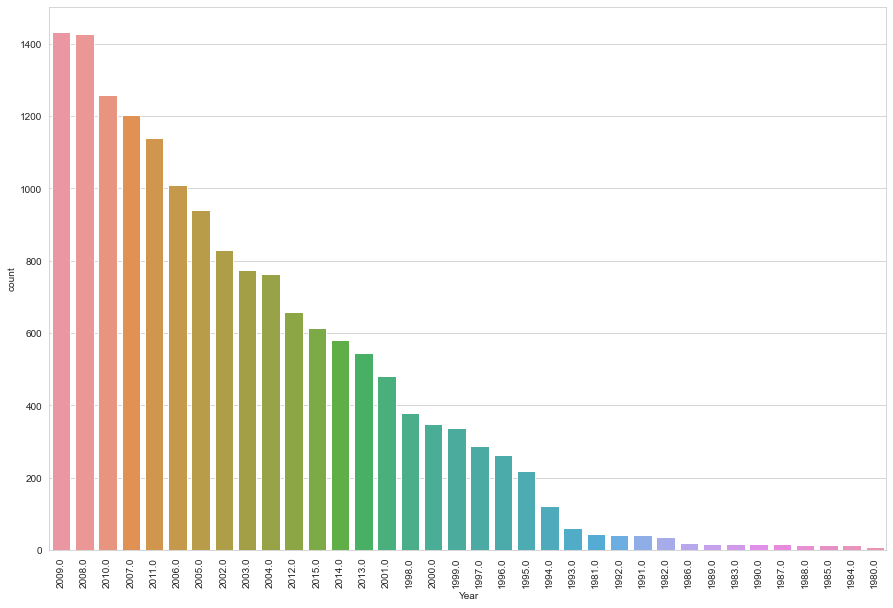

In [23]:
plt.figure(figsize = (15,10))
sns.countplot(x='Year', data = df, order = df.groupby(by = ['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

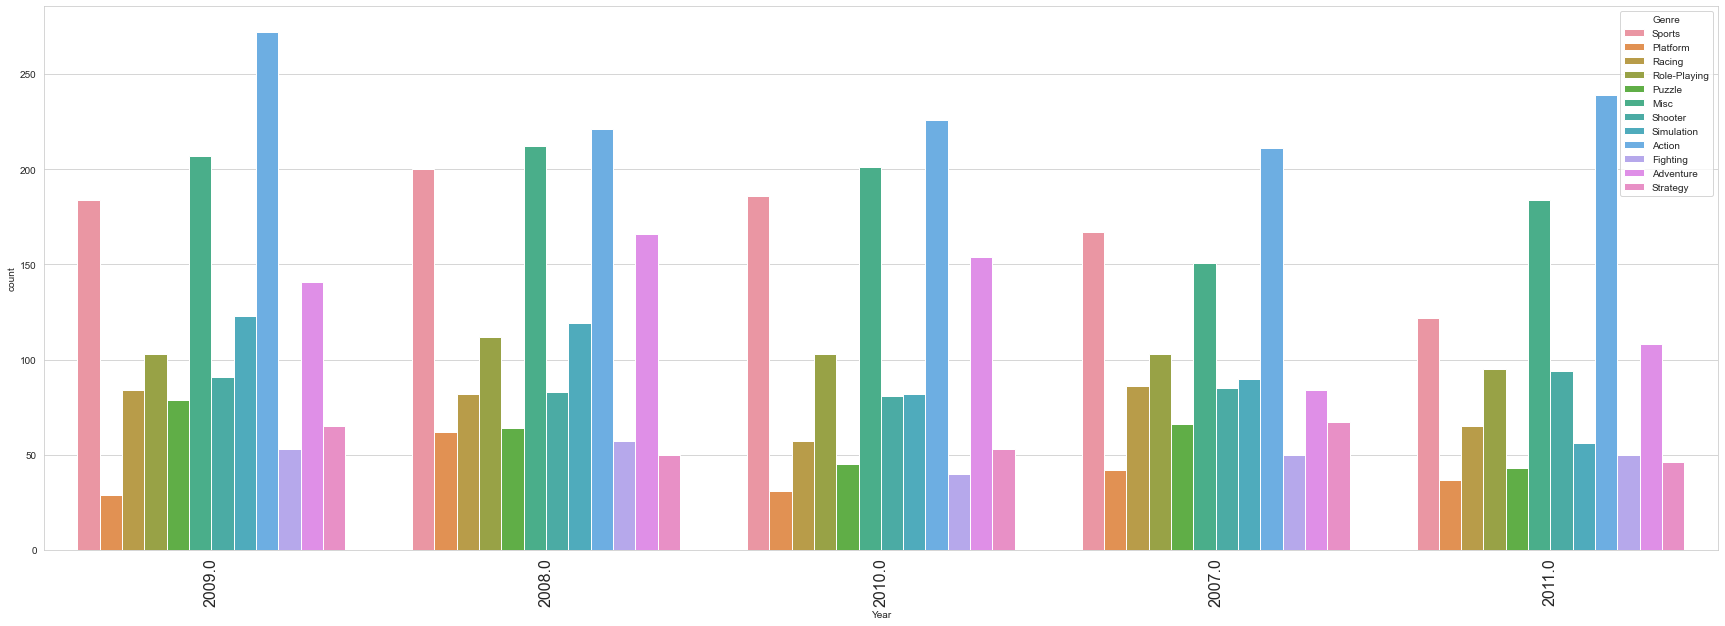

In [24]:
plt.figure(figsize = (30,10))
sns.countplot(x='Year',data=df, hue = 'Genre', order = df.Year.value_counts().iloc[:5].index)
plt.xticks(size = 16, rotation = 90)

In [25]:
df_year = df.groupby(by = ['Year'])['Global_Sales'].sum()
df_year = df_year.reset_index()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

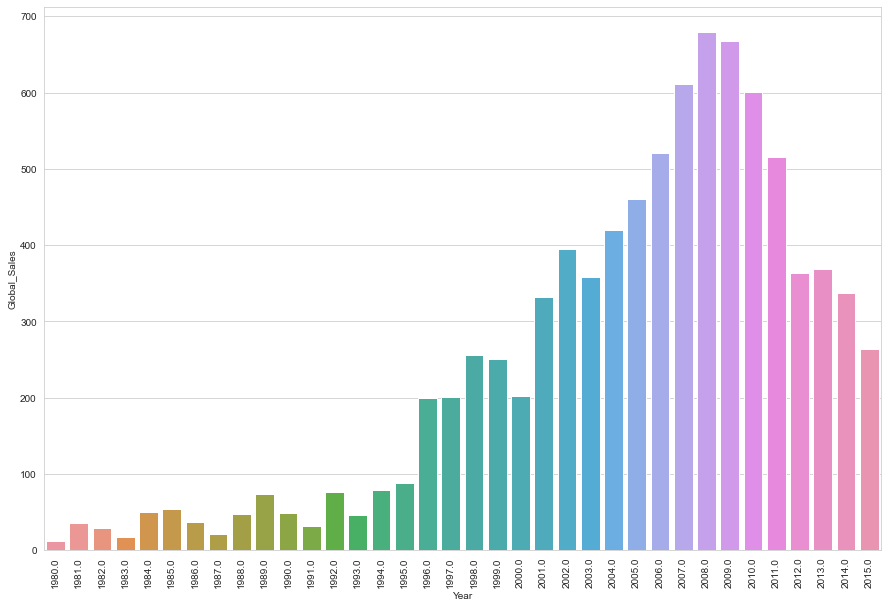

In [26]:
plt.figure(figsize = (15,10))
sns.barplot(x='Year', y = 'Global_Sales', data = df_year)
plt.xticks(rotation = 90)

In [27]:
year_max_df = df.groupby(['Year','Genre']).size().reset_index(name = 'count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset = ['Year','count'], keep ='last').reset_index(drop=True)

In [28]:
genre = year_max_genre['Genre'].values

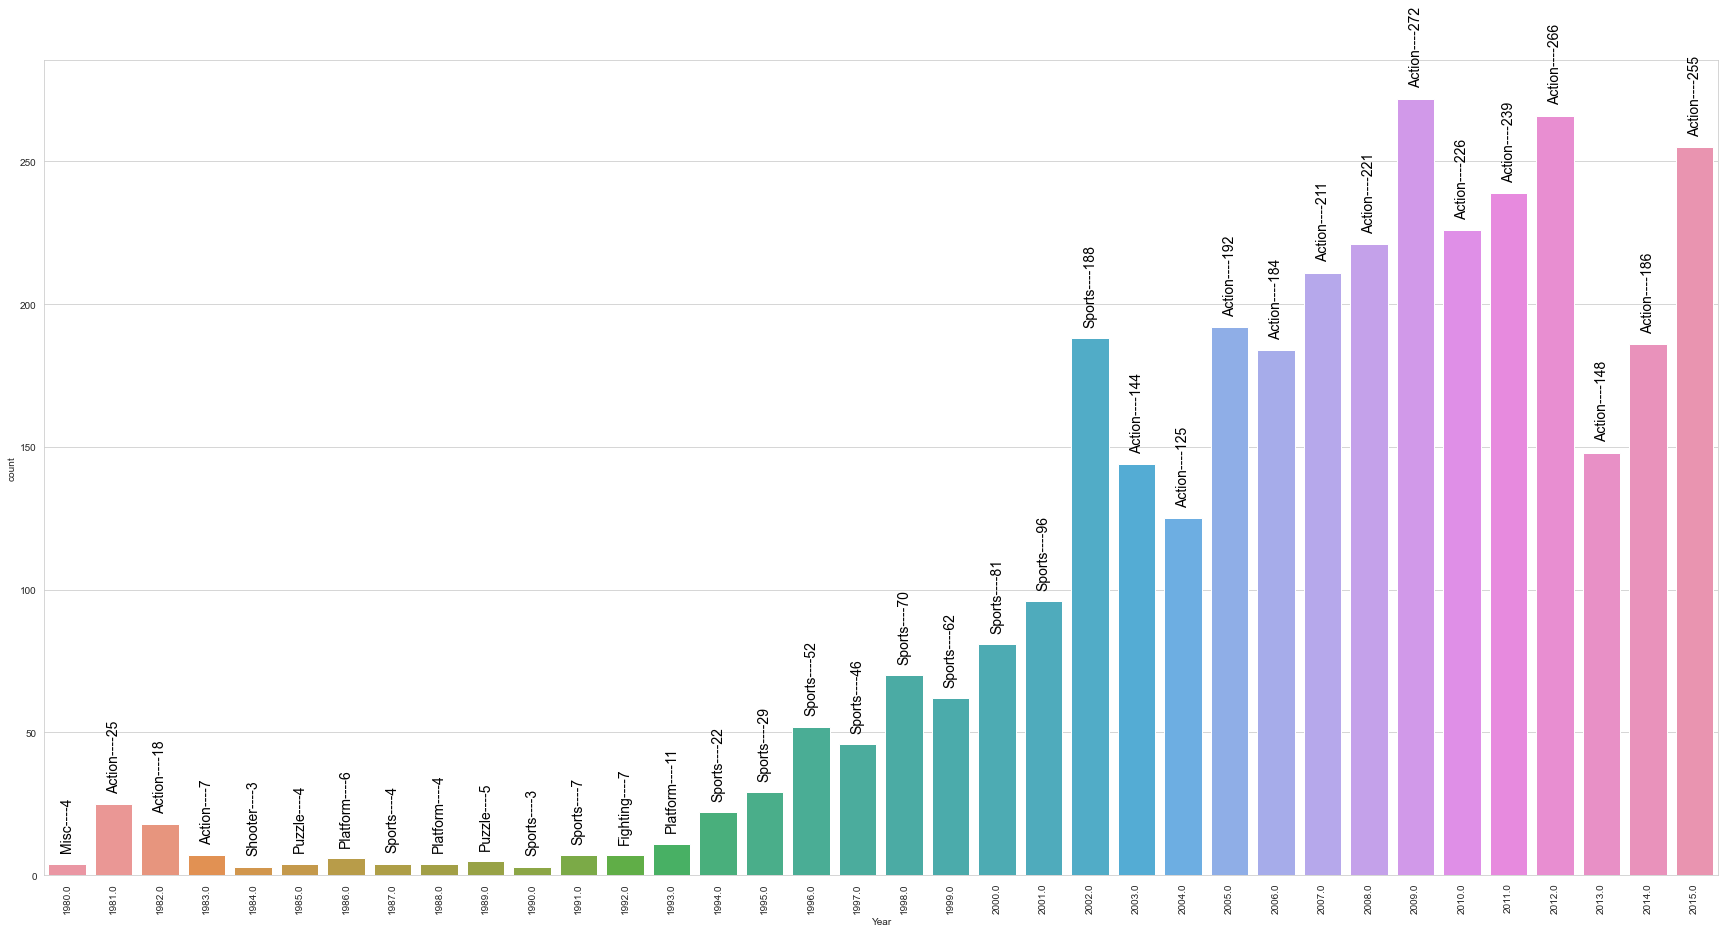

In [29]:
plt.figure(figsize =(30,15))
g = sns.barplot(x='Year', y = 'count', data = year_max_genre)
index = 0 
for value in year_max_genre['count'].values:
    g.text(index, value + 5, str(genre[index] + '----' + str(value)),
    color = '#000', size = 14, rotation = 90, ha = 'center')
    index += 1

plt.xticks(rotation = 90)
plt.show()

In [30]:
year_sale_dx = df.groupby(by=['Year','Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by = ['Year'])['Global_Sales'].transform(max) == year_sale_dx['Global_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

In [31]:
genre = year_sale_max['Genre']

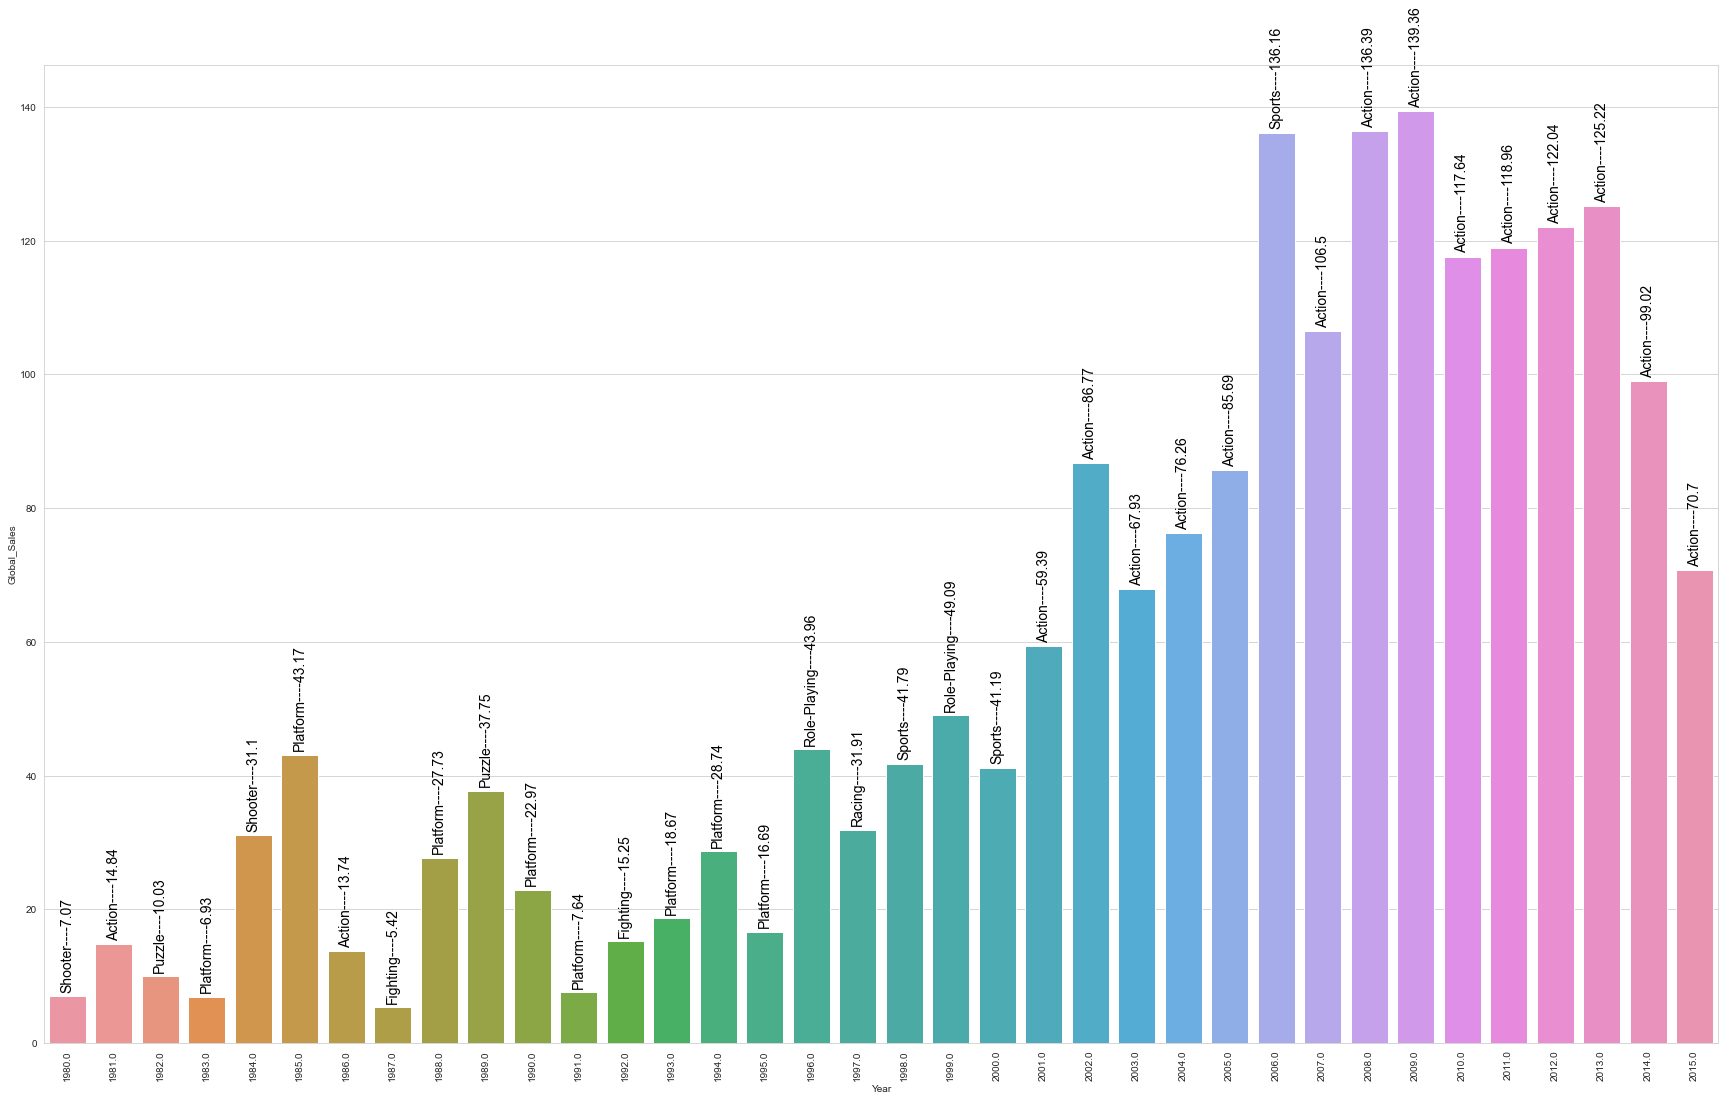

In [32]:
plt.figure(figsize = (30,18))
g = sns.barplot(x = 'Year', y = 'Global_Sales', data=year_sale_max)
index = 0 
for value in year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '----' + str(round(value,2))),
    color = '#000', size = 14, rotation = 90, ha = 'center')
    index += 1
plt.xticks(rotation = 90)
plt.show()

In [33]:
data_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by = ['Global_Sales'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

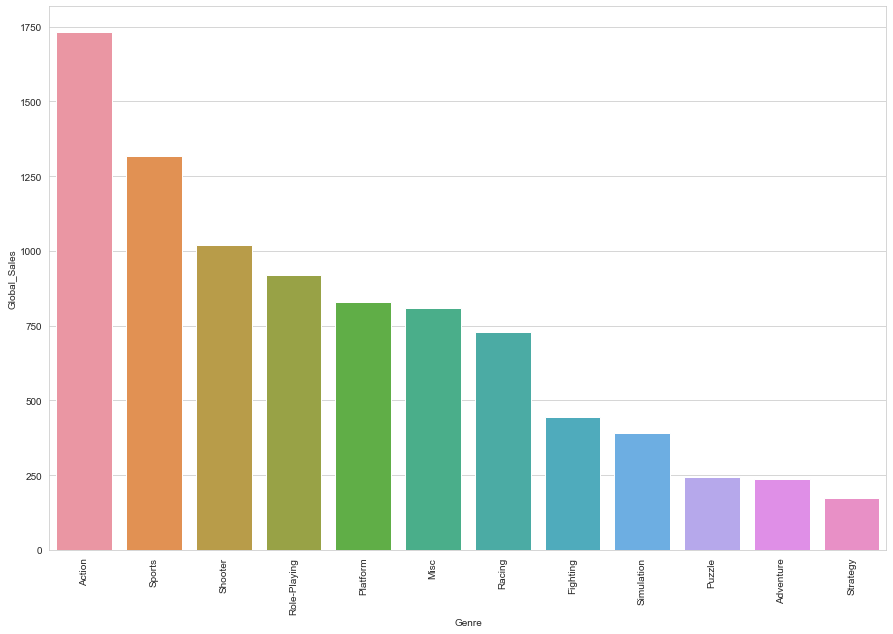

In [34]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Genre', y = 'Global_Sales', data = data_genre)
plt.xticks(rotation = 90)

In [35]:
data_platform = df.groupby (by = ['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending= False)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'GB'),
  Text(11, 0, 'NES'),
  Text(12, 0, '3DS'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'GC'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'SCD'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'WS'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

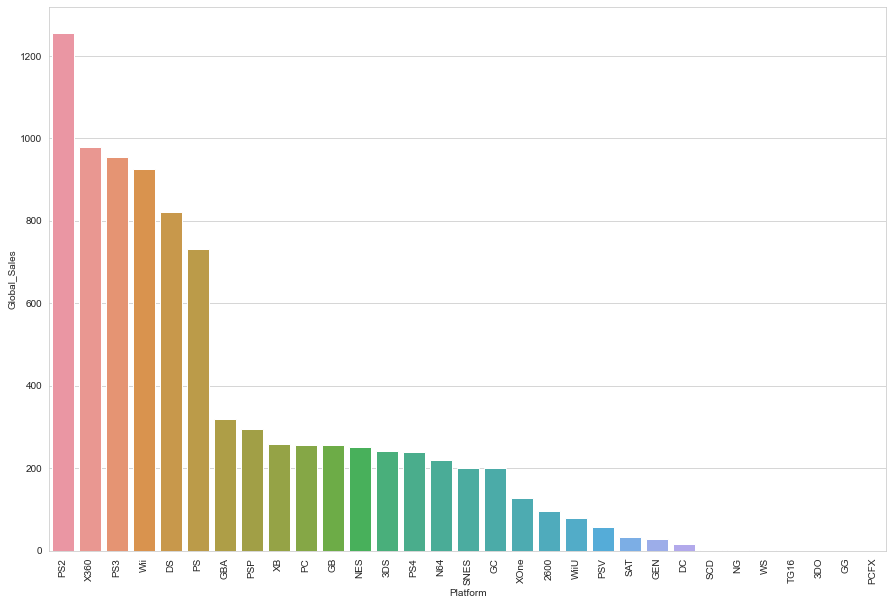

In [36]:
plt.figure(figsize = (15,10))
sns.barplot(x='Platform', y ='Global_Sales', data=data_platform)
plt.xticks(rotation = 90)

In [37]:
top_game_sale = df.head(20)
top_game_sale = top_game_sale[['Name','Year','Genre','Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'],ascending = False)

In [38]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0,20)

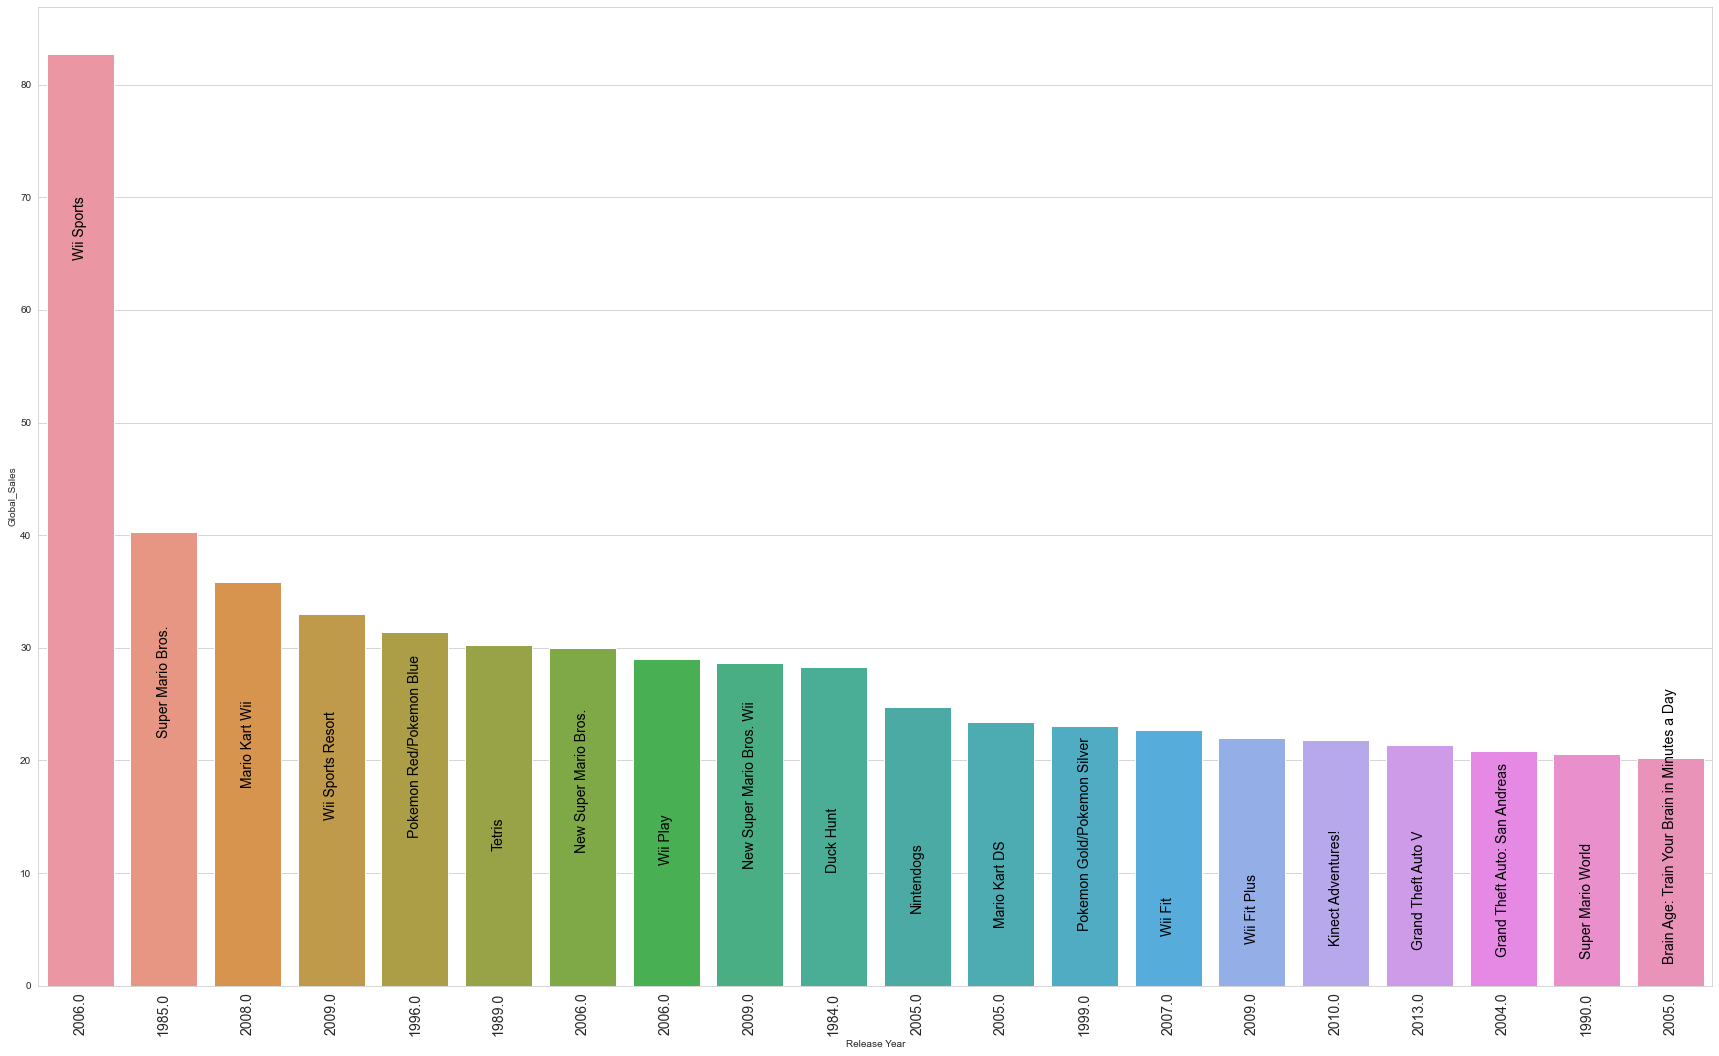

In [39]:
plt.figure(figsize = (30,18))
g = sns.barplot(x = 'Name', y = 'Global_Sales', data=top_game_sale)
index = 0 
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color = '#000', size = 14, rotation = 90, ha = 'center')
    index += 1
plt.xticks(y,top_game_sale['Year'], fontsize = 14, rotation = 90)
plt.xlabel('Release Year')
plt.show()

In [40]:
comp_genre = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()

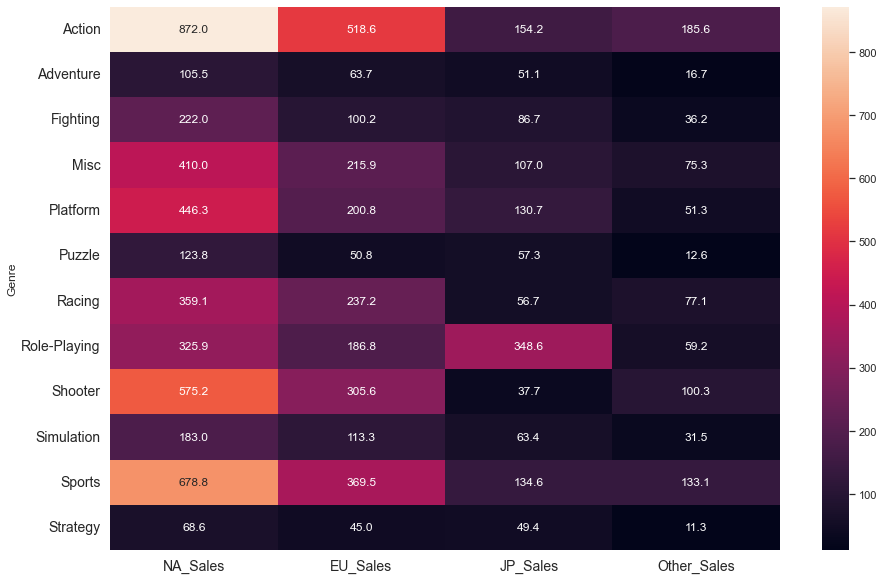

In [43]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot = True, fmt = '.1f')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [44]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], 
value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'], var_name = 'Sale_Area', value_name = 'Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<AxesSubplot:xlabel='Genre', ylabel='Sale_Price'>

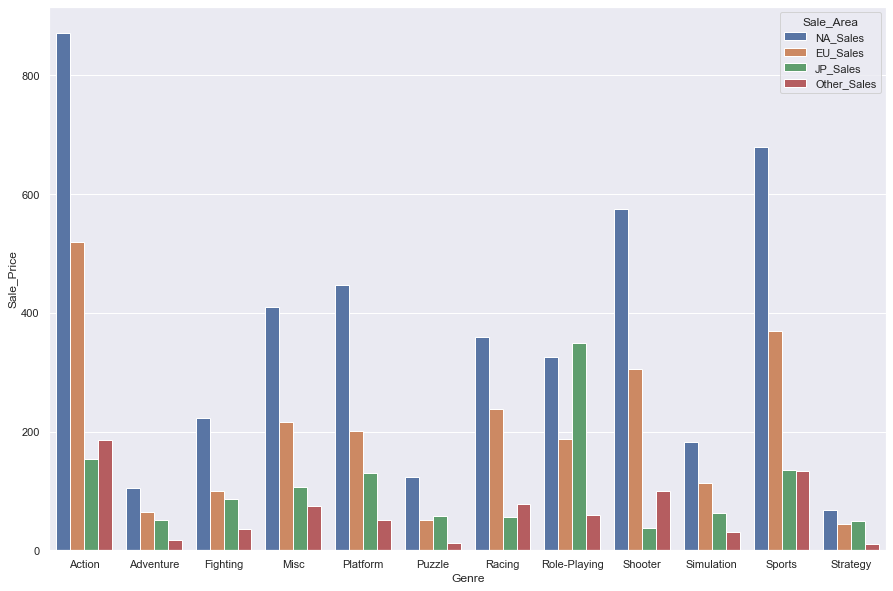

In [45]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Genre', y = 'Sale_Price', hue='Sale_Area', data= comp_table)

In [46]:
comp_platform = df [['Platform', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [48]:
comp_platform = comp_platform.groupby(by = ['Platform']).sum().reset_index()


In [49]:
comp_table = pd.melt(comp_platform, id_vars = ['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
var_name = 'Sale_Area', value_name = 'Sale_Price')
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


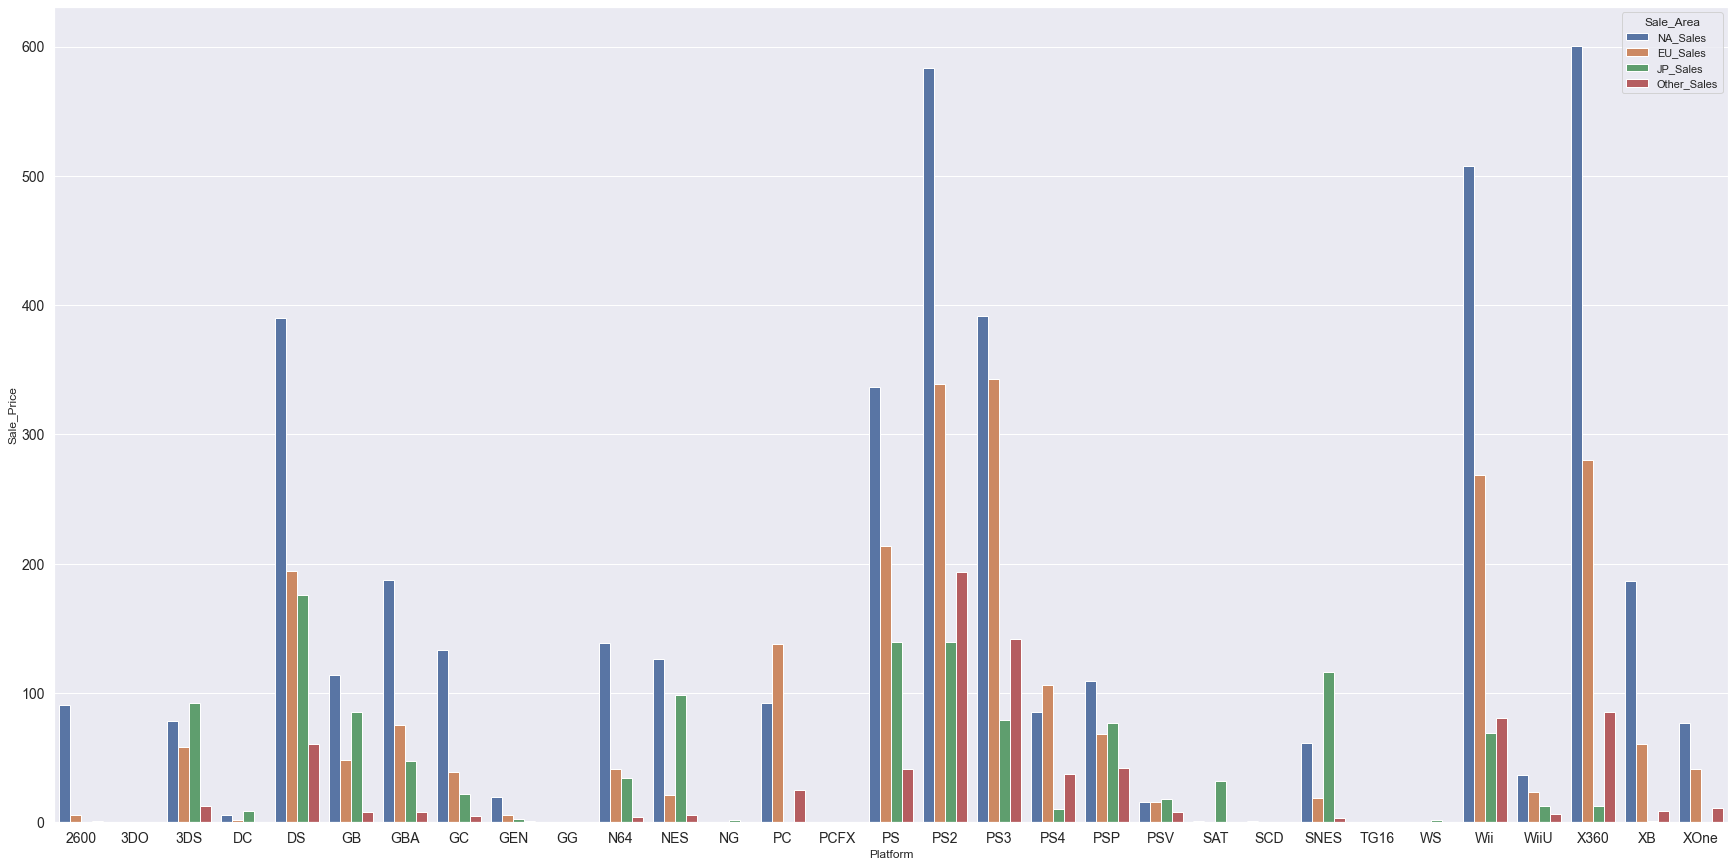

In [50]:
plt.figure(figsize = (30,15))
sns.barplot(x='Platform', y = 'Sale_Price', hue='Sale_Area', data = comp_table)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


In [52]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending = False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Ubisoft'),
  Text(3, 0, 'Namco Bandai Games'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Disney Interactive Studios'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Warner Bros. Interactive Entertainment'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

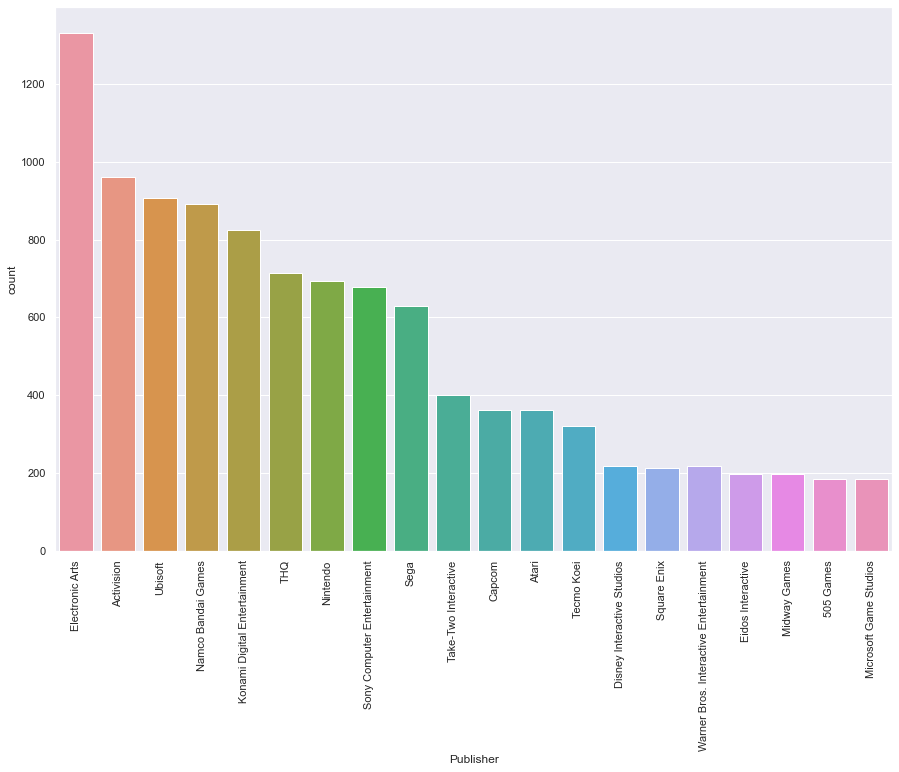

In [53]:
plt.figure (figsize = (15,10))
sns.countplot(x='Publisher', data = df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending =False).iloc[:20].index)

plt.xticks(rotation = 90)

In [54]:
sale_pbl = df[['Publisher','Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

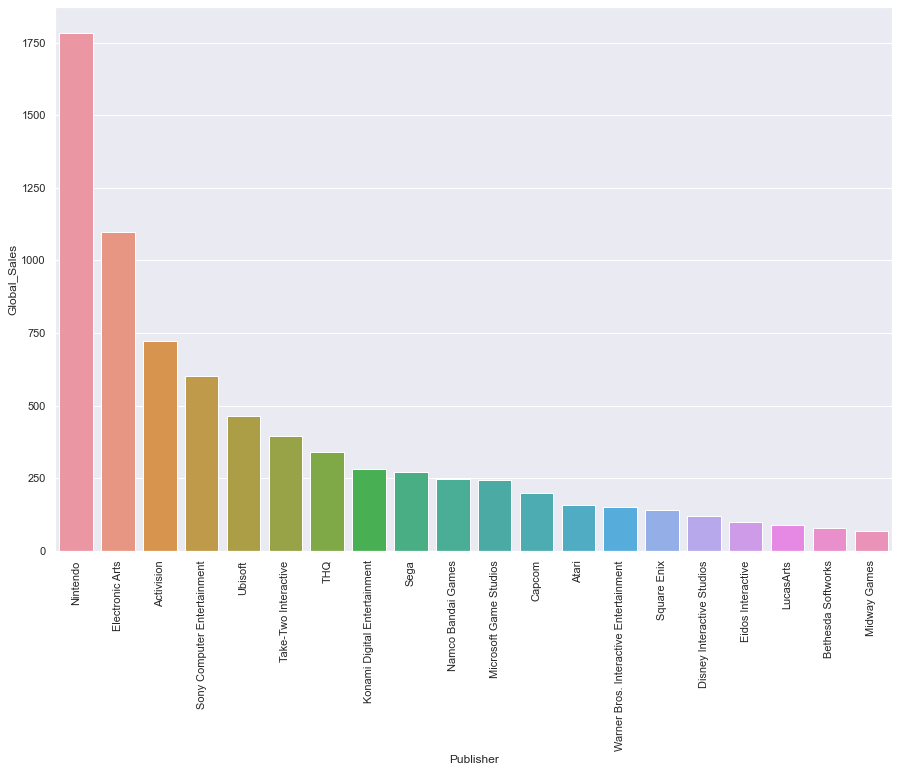

In [55]:
plt.figure(figsize = (15,10))
sns.barplot(x='Publisher', y = 'Global_Sales', data = sale_pbl)
plt.xticks(rotation = 90)

In [56]:
comp_publisher = df[['Publisher', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [57]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending = False)
comp_publisher = comp_publisher.head(20)

In [58]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'],value_vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
var_name = 'Sale_Area', value_name = 'Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,9.87


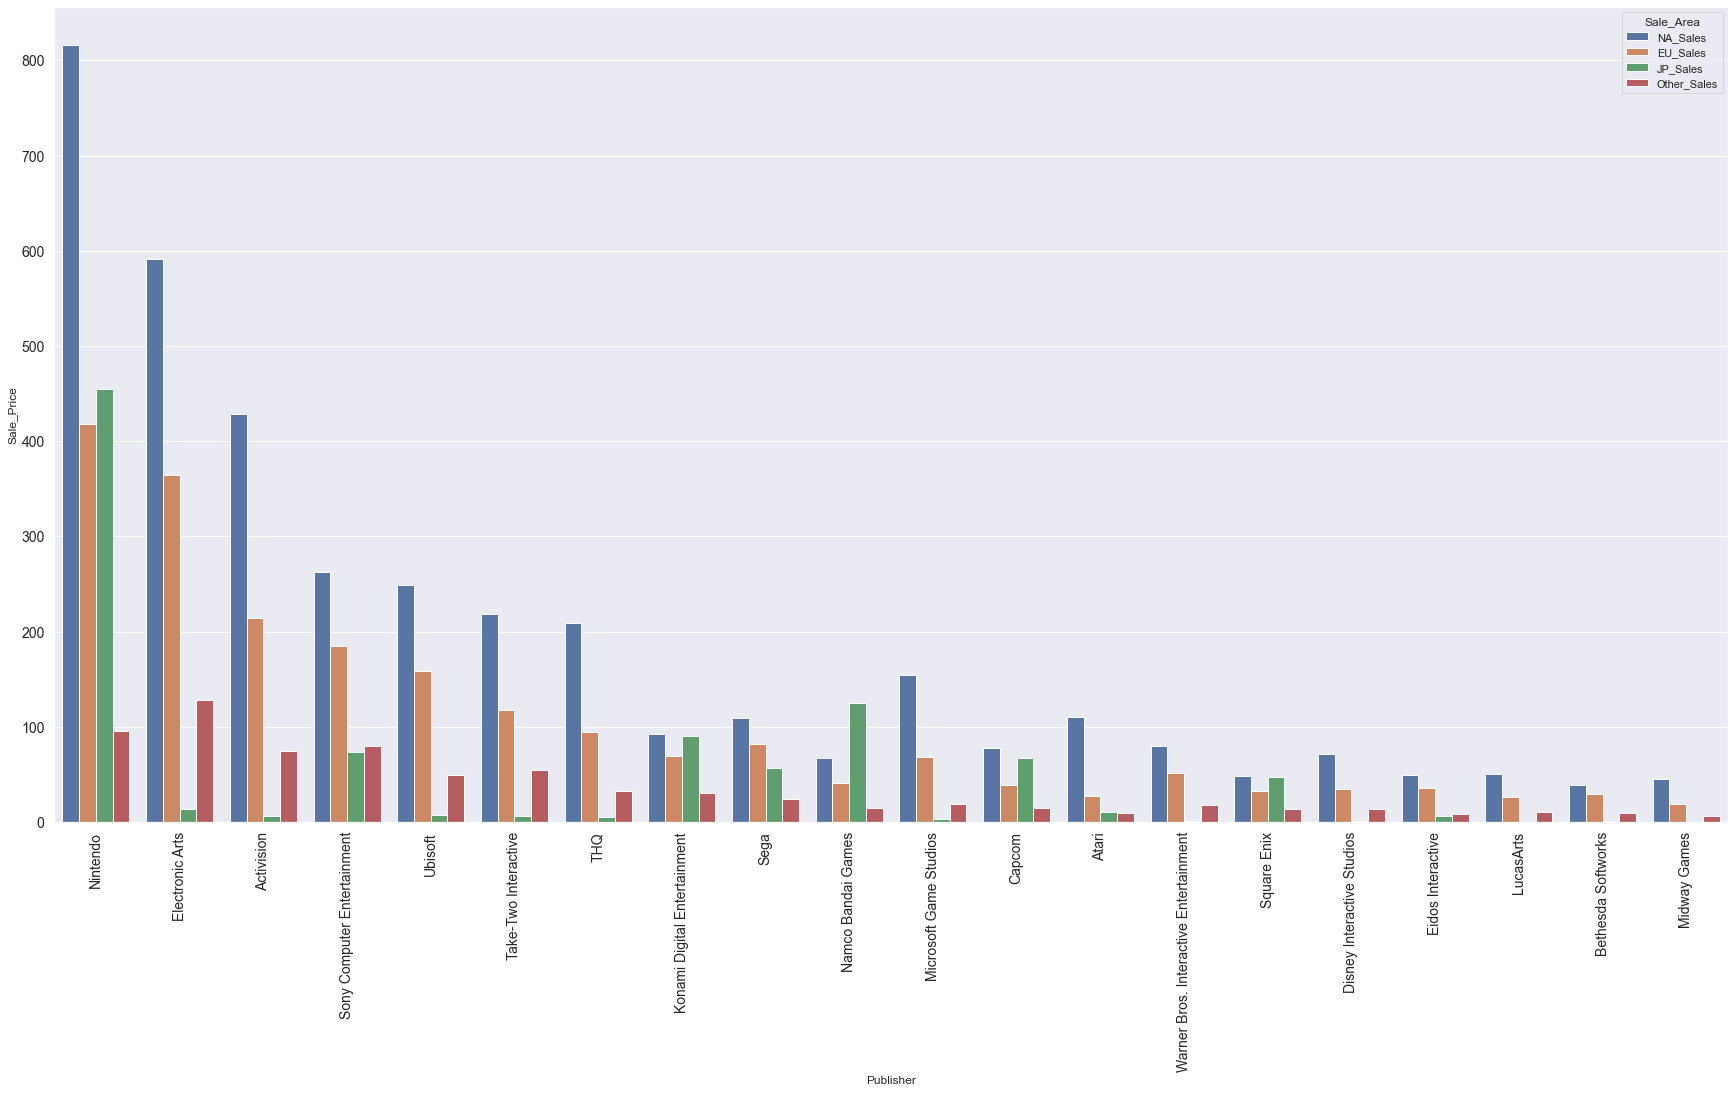

In [59]:
plt.figure(figsize = (30,15))
sns.barplot(x='Publisher', y='Sale_Price', hue = 'Sale_Area', 
data = comp_publisher)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.show()

In [60]:
top_publisher = df[['Year','Publisher']]
top_publisher_df = top_publisher.groupby(by = ['Year','Publisher']).size().reset_index(name = 'Count')
top_publisher_idx = top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop = True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=['Year','Count'],keep='last').reset_index(drop=True)

In [61]:
publisher = top_publisher_count['Publisher']

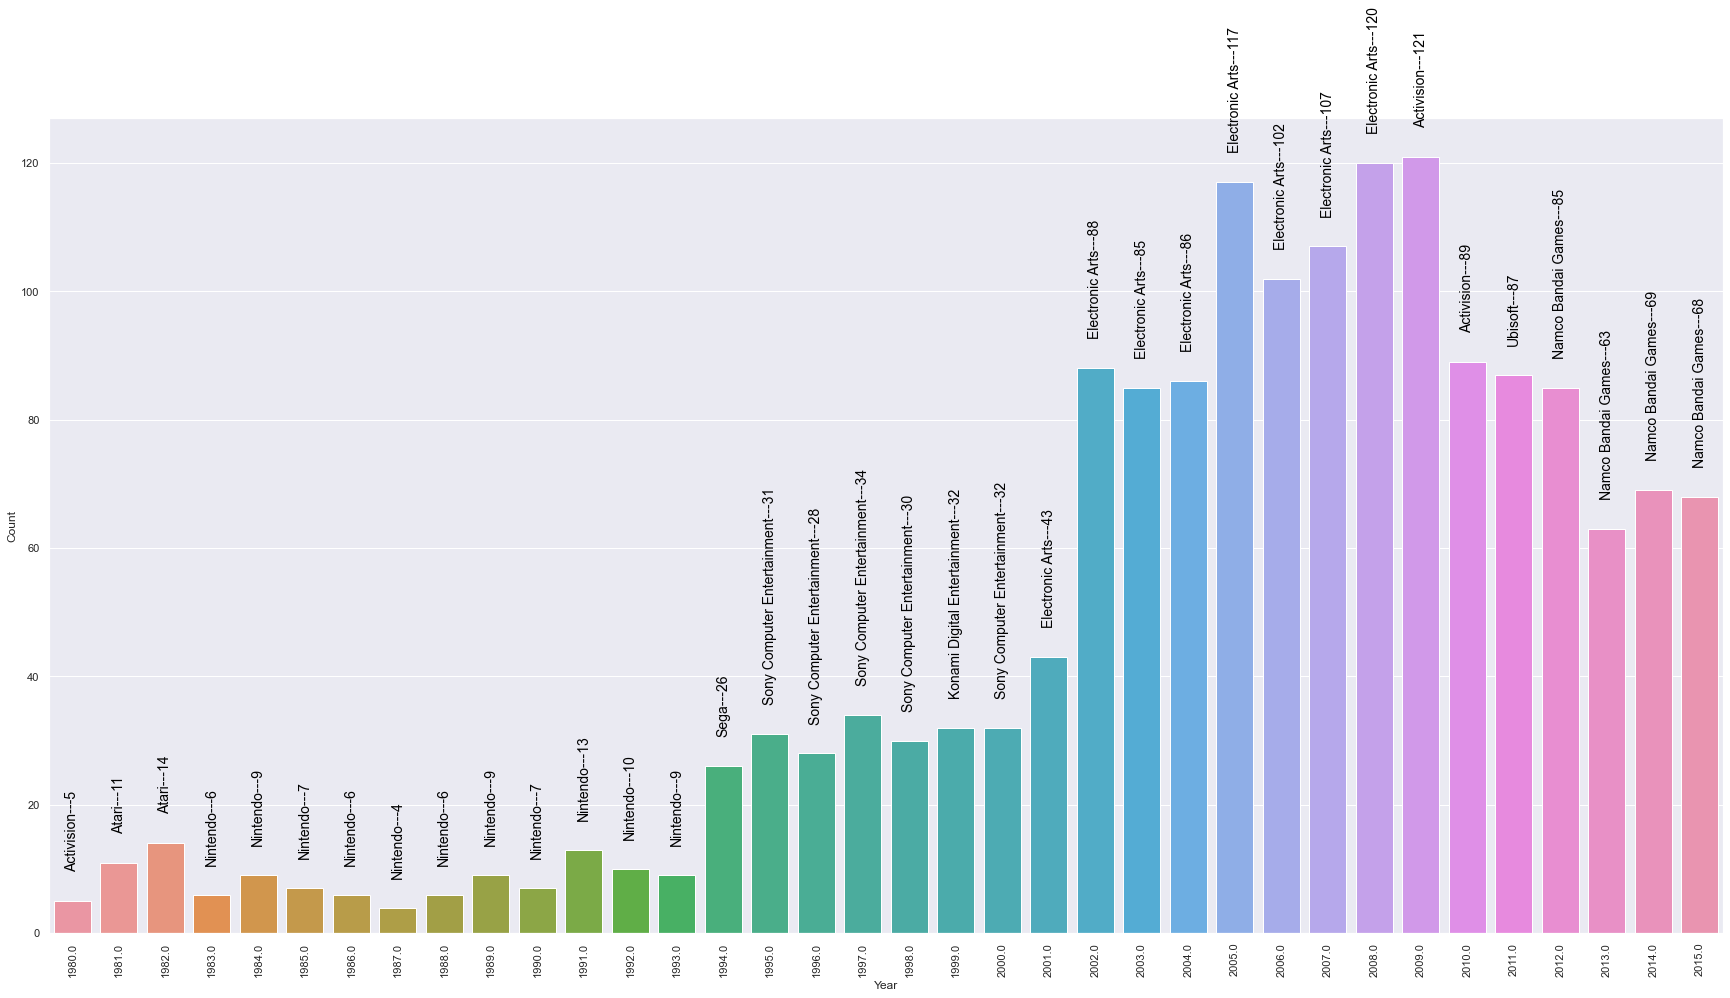

In [65]:
plt.figure(figsize = (30,15))
g = sns.barplot(x='Year', y ='Count', data = top_publisher_count)
index = 0 
for value in top_publisher_count['Count'].values:
    g.text(index, value+5, str(publisher[index] + '---' + str(value)), color = '#000', size = 14, rotation = 90, ha = 'center')
    index += 1

plt.xticks(rotation = 90)
plt.show()

In [71]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns= {'index': 'region',0:'sale'})
top_sale_reg

,region,sale
0,NA_Sales,4370.02
1,EU_Sales,2407.37
2,JP_Sales,1277.27
3,Other_Sales,789.98


<AxesSubplot:xlabel='region', ylabel='sale'>

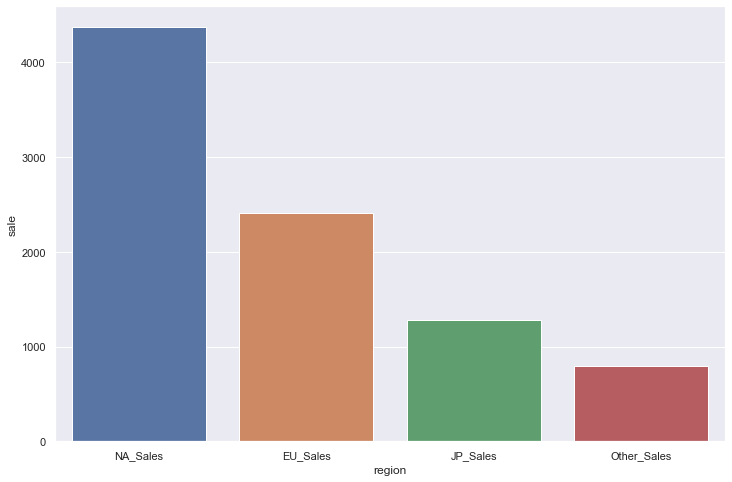

In [73]:
plt.figure(figsize = (12,8))
sns.barplot(x='region', y = 'sale', data = top_sale_reg)

In [75]:
labels = top_sale_reg['region']
size = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x21169f884f0>,
 [Text(-1.0998101987078979, 0.020433472981709867, 'NA_Sales'),
  Text(0.8027109043560947, -0.7521005278736486, 'EU_Sales'),
  Text(0.9343594784564982, 0.5804932084172052, 'JP_Sales'),
  Text(0.30462466305633346, 1.0569786254498317, 'Other_Sales')],
 [Text(-0.5998964720224897, 0.011145530717296289, '49.4%'),
  Text(0.4378423114669607, -0.4102366515674446, '27.2%'),
  Text(0.5096506246126353, 0.31663265913665734, '14.4%'),
  Text(0.16615890712163642, 0.576533795699908, '8.9%')])

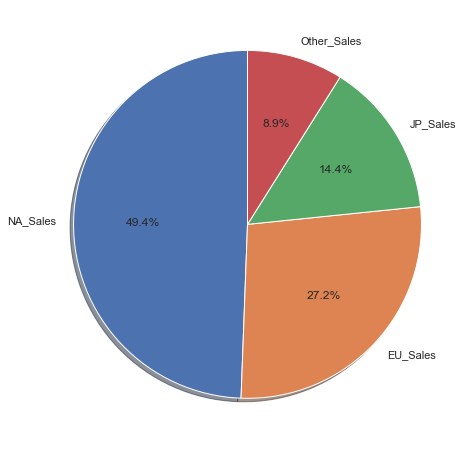

In [76]:
plt.figure(figsize = (10,8))
plt.pie(size, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90)

c:\Users\lenal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lenal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lenal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

KeyError: 'Global Sales'

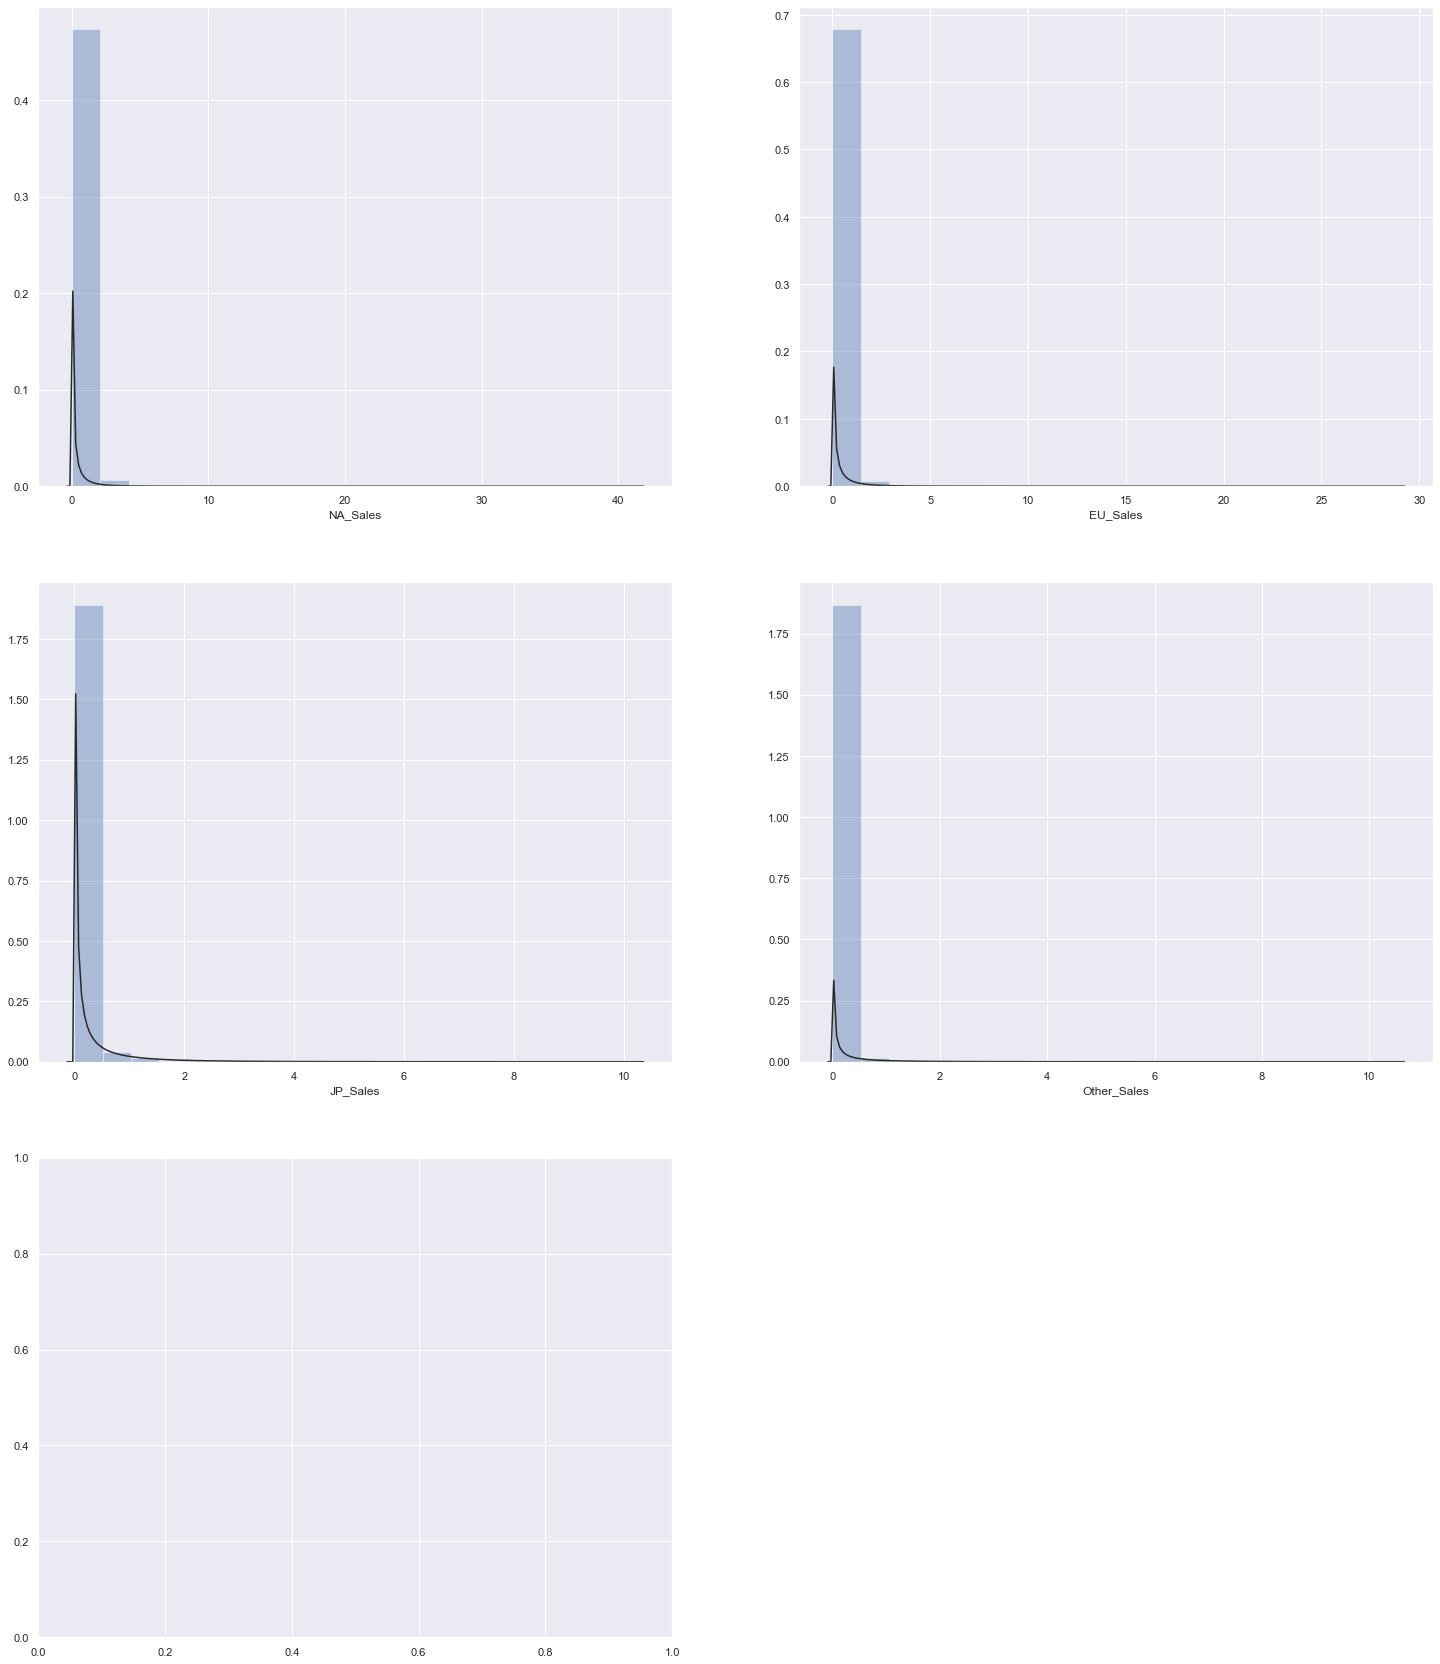

In [78]:
plt.figure(figsize = (25,30))
sales_column = ['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales','Global Sales']
for i, column in enumerate(sales_column):
    plt.subplot(3,2,i+1)
    sns.distplot(df[column], bins=20,kde=False, fit = stats.gamma)

In [81]:
data_hist_log = df.copy()


In [84]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]
data_hist_log

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
11562,11564,Final Fantasy XI: Vana'diel Collection 2008,PS2,2007.0,Role-Playing,Square Enix,0.03,0.03,0.01,0.01,0.08
11838,11840,Mugen Souls Z,PS3,2013.0,Role-Playing,Nippon Ichi Software,0.02,0.01,0.04,0.01,0.07
11896,11898,Grand Kingdom,PSV,2015.0,Role-Playing,Nippon Ichi Software,0.01,0.02,0.04,0.01,0.07
13000,13002,Natural Doctrine,PS3,2014.0,Role-Playing,Nippon Ichi Software,0.03,0.01,0.01,0.01,0.05


c:\Users\lenal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lenal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\lenal\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

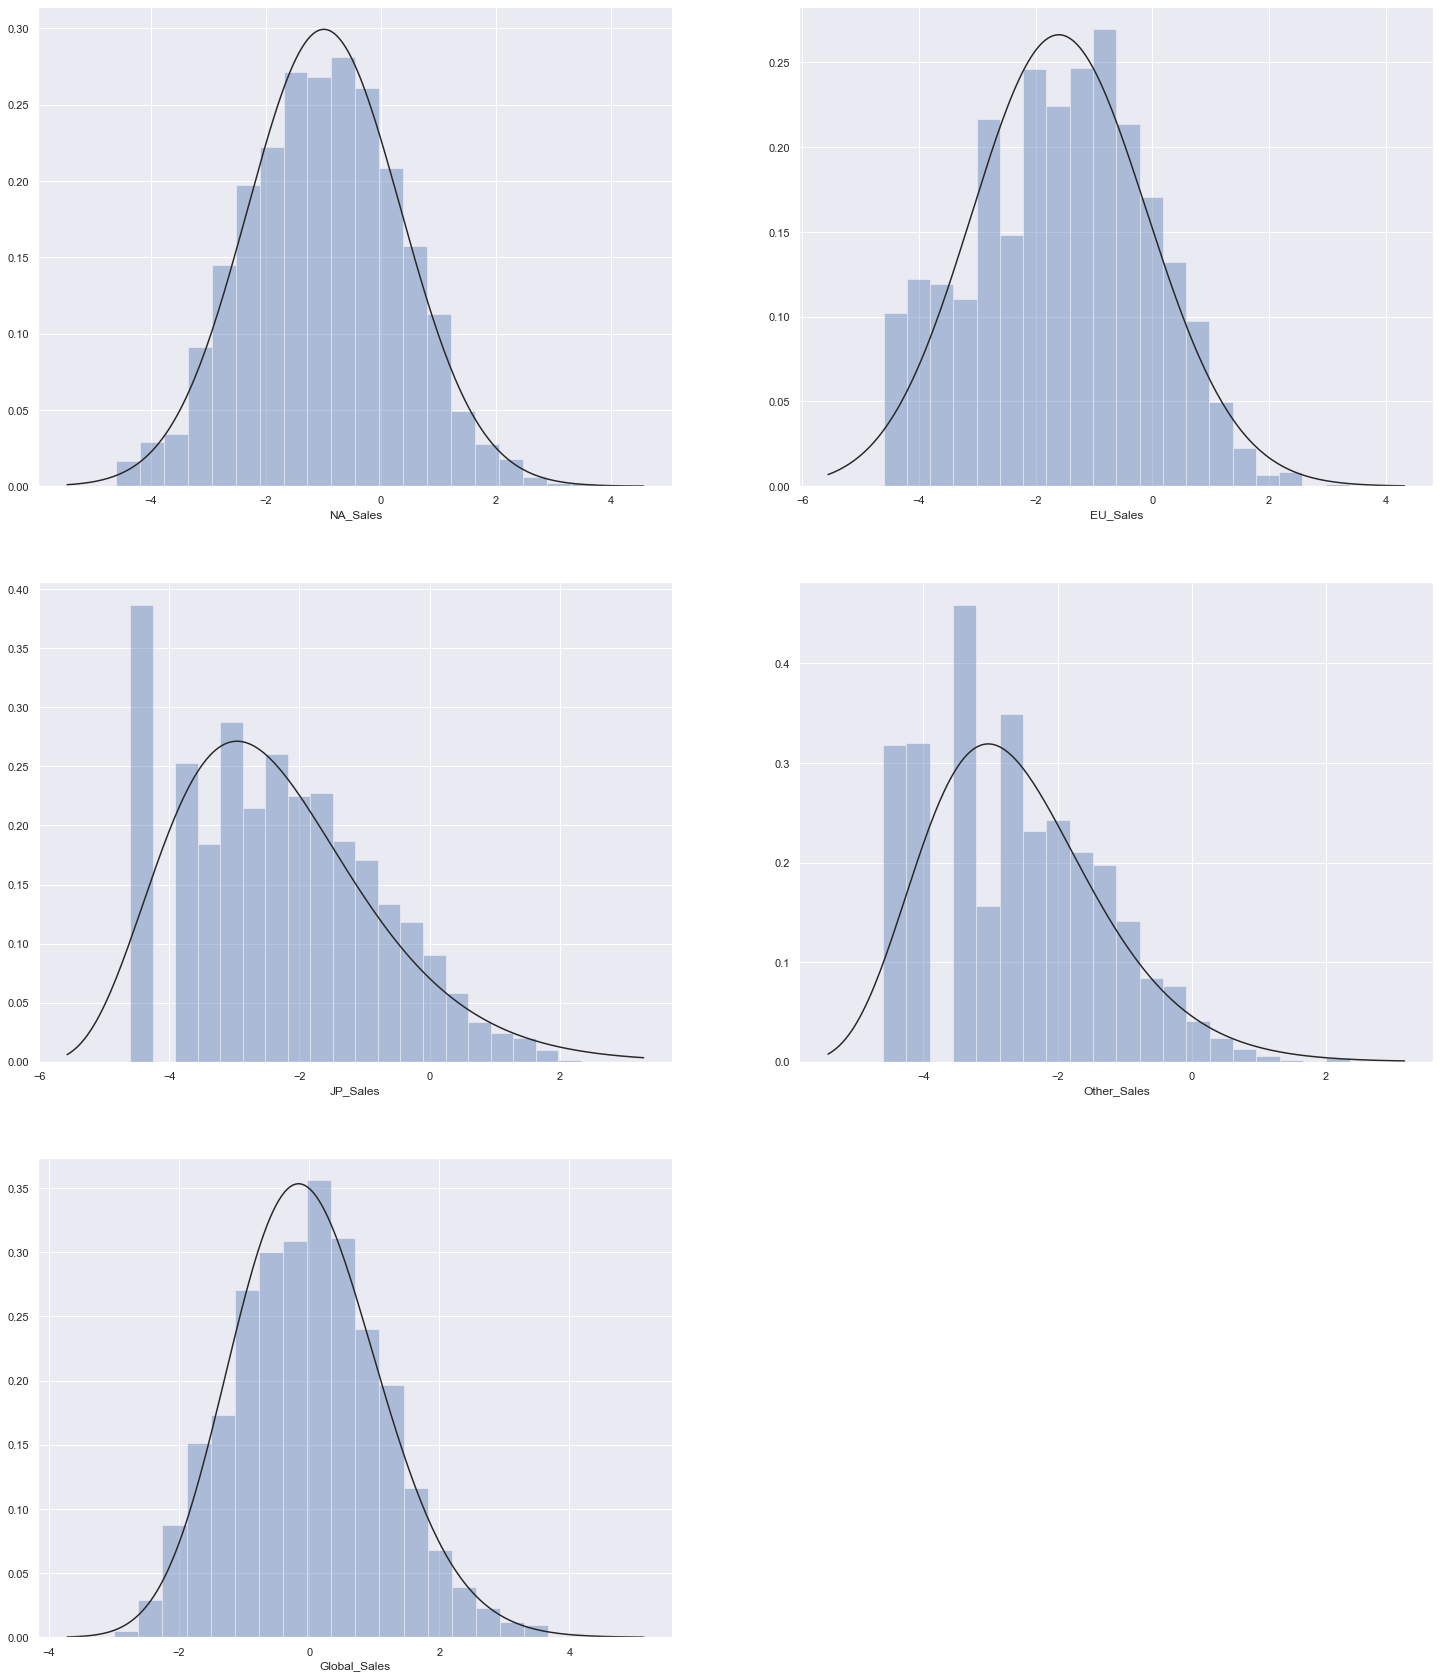

In [86]:
plt.figure(figsize = (25,30))
sales_column = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_column):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins= 20, kde = False, fit = stats.gamma)

<AxesSubplot:>

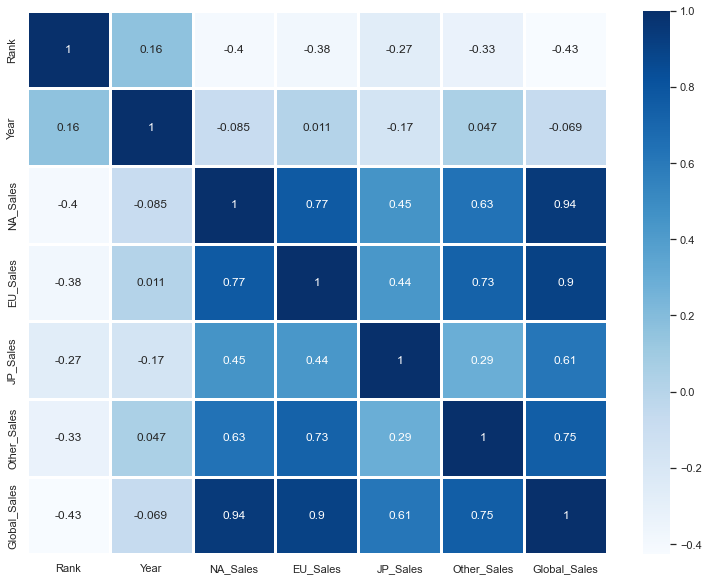

In [87]:
plt.figure(figsize = (13, 10))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, linewidth = 3)

In [89]:
data_pair = df.loc[:,['Year', 'Platform','Genre','NA_Sales','EU_Sales','Other_Sales']]
data_pair

,Year,Platform,Genre,NA_Sales,EU_Sales,Other_Sales
0,2006.0,Wii,Sports,41.49,29.02,8.46
1,1985.0,NES,Platform,29.08,3.58,0.77
2,2008.0,Wii,Racing,15.85,12.88,3.31
3,2009.0,Wii,Sports,15.75,11.01,2.96
4,1996.0,GB,Role-Playing,11.27,8.89,1.00
...,...,...,...,...,...,...
16593,2002.0,GBA,Platform,0.01,0.00,0.00
16594,2003.0,GC,Shooter,0.01,0.00,0.00
16595,2008.0,PS2,Racing,0.00,0.00,0.00
16596,2010.0,DS,Puzzle,0.00,0.01,0.00


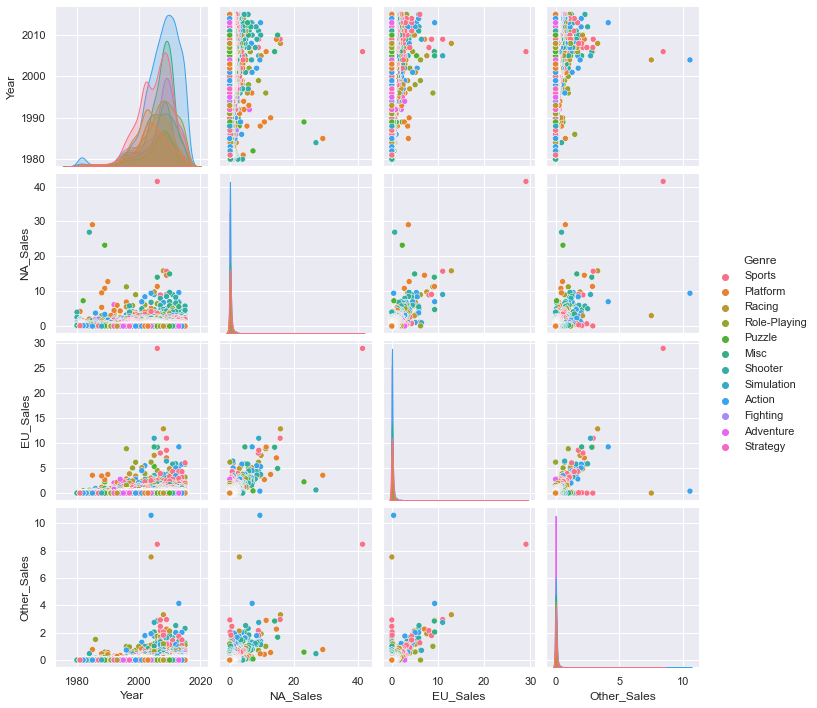

In [90]:
sns.pairplot(data_pair, hue ='Genre')